# 1.2 Problem Statement 


### 1. The Problem and the Objective

#### Problem : Build a predictive model to estimate the likelihood of customer churn for a telecommunication company. The model should consider factors such as customer demographics, usage pattemns, billing history and customer service interactions.

#### Objective : The objective is to minimize churn by identifying at-risk customers so that to retain the customers

### 2. Understanding the data

In [100]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')


### Load and view the dataset

In [63]:
#load the data
data = pd.read_csv(r"C:\Users\Hi\Desktop\Hackthon-PIDC\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head() # read the first 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
#shape of the dataset
data.shape

(7043, 21)

In [65]:
#view or analyze the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### From the above data column overview 

-- customerID: Its an objective and the customerID is a unique indentifier for each custoemr so it cannot provide any value. 

-- gender: Gender is an objective   

-- SeniorCitizen: Its a numeric and it can be used directly to our model ans it indicates whether the customer is a senior citizen  

-- Partner: Its a objective

-- Dependents: Its a an objective
   
-- tenure: This is the number of months the customer has stayed with the company.

-- PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod -- **all the columns are objective and needs to convert into numeric variable**
    
-- MonthlyCharges: Its a float64 and This is already numeric and can be used directly
    

-- TotalCharges: its an objective needs to convert into numeric

-- Churn: Its an obejctive and This is the target variable. Encode as binary (e.g., No = 0, Yes = 1).
   

In [66]:
# stastistical description
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Insights from the above statistical description

##### SeniorCitizen
-- Only about 16.2% of the customers are senior citizens, indicating that the majority (83.8%) are not senior citizens.

##### Tenure
-- The average tenure of customers is approximately 32.4 months, with a significant spread as indicated by the standard deviation of 24.56 months.
-- There is a wide range of customer tenure from 0 to 72 months, indicating a mix of new and long-term customers.

##### MonthlyCharges
-- The average monthly charge is approximately $64.76

-- The monthly charges show a significant range, indicating various service plans and usage levels among customers.


### 3. Data Preparation
Data preperation includes data cleaning, finding the outliers and finding the incorrect data entities


In [67]:
data.columns # columns the dataset contains

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [73]:
## total charge is in the wrong format -- the datatype is in the wrong format
data['TotalCharges'].isna().sum()

0

In [74]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtypes

dtype('float64')

In [75]:
# checking if there are any null values in dataset
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

--  there are no null values in the dataset, it is good to proceed and if in case the dataset has any missing values then replace the null values by using mean, median and mode with a constant value that is meaningful for the dataset. Mean and median are for numeric data and mode is for categorical data

In [76]:
## LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [77]:

# Encoding Categorical Variables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','TotalCharges',
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

# Label encoding for binary features and target
label_enc = LabelEncoder()
for col in categorical_features:
    data[col] = label_enc.fit_transform(data[col])


In [78]:
# check the dataset after labelencoding
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,74,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,3624,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,536,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,3570,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,3700,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,6304,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,1265,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,1157,1


### 4. Exploratory Data Analysis - EDA
-- EDA helps to understanding data to see the patterns, trends, and relationships. It helps prepare the data for further analysis 

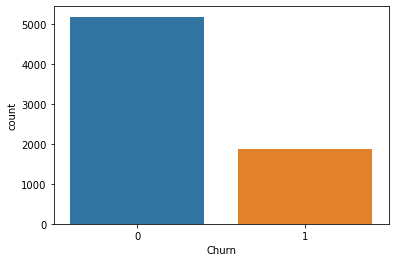

In [79]:
# Visualize distribution of churn
sns.countplot(x='Churn', data=data)
plt.show()


-- the dataset is imbalanced

In [71]:
data['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

#### Univariate Analysis 


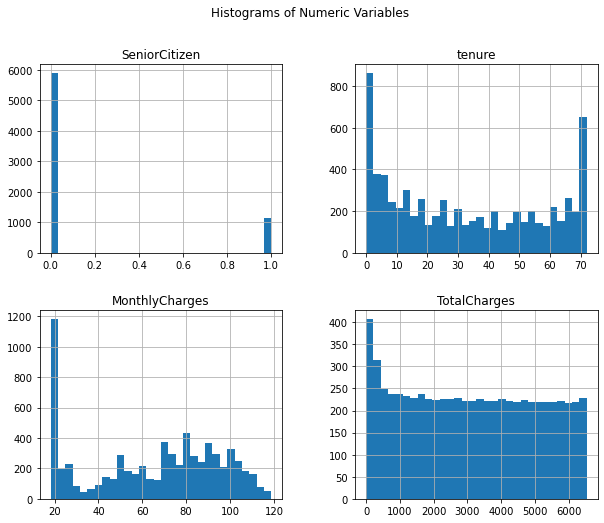

In [83]:
# for numeric variables
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_features].hist(bins=30, figsize=(10,8))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

-- from the above histogram it has observed that 

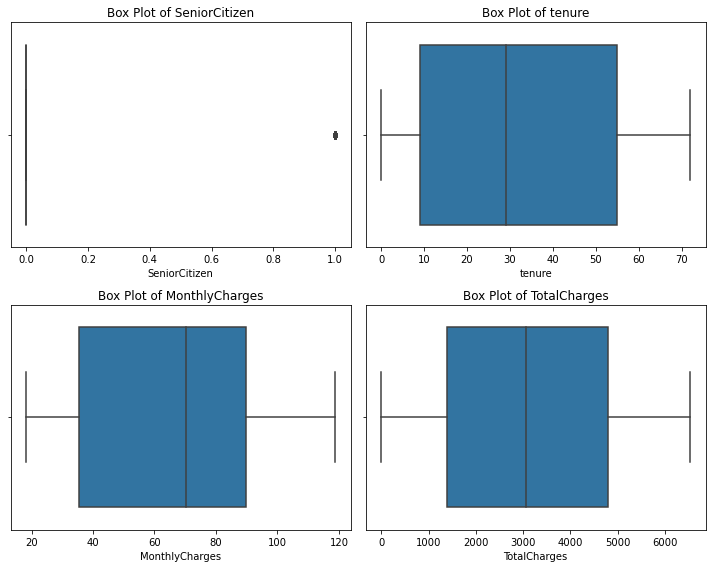

In [143]:
# Plot box plots for numeric features
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

-- boxplot is used to find the outliers by using the 5 point summary. (Q1.Q2,Q3, and IQR=Q3-Q1 and by calculating the lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR) from the formula, it will check the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers.

-- from the boxplot, it has observed that 'tenure', 'monthlycharges', 'totalcharges' has no outliers. which means we have a good data. but seniorcitizen has outliers 

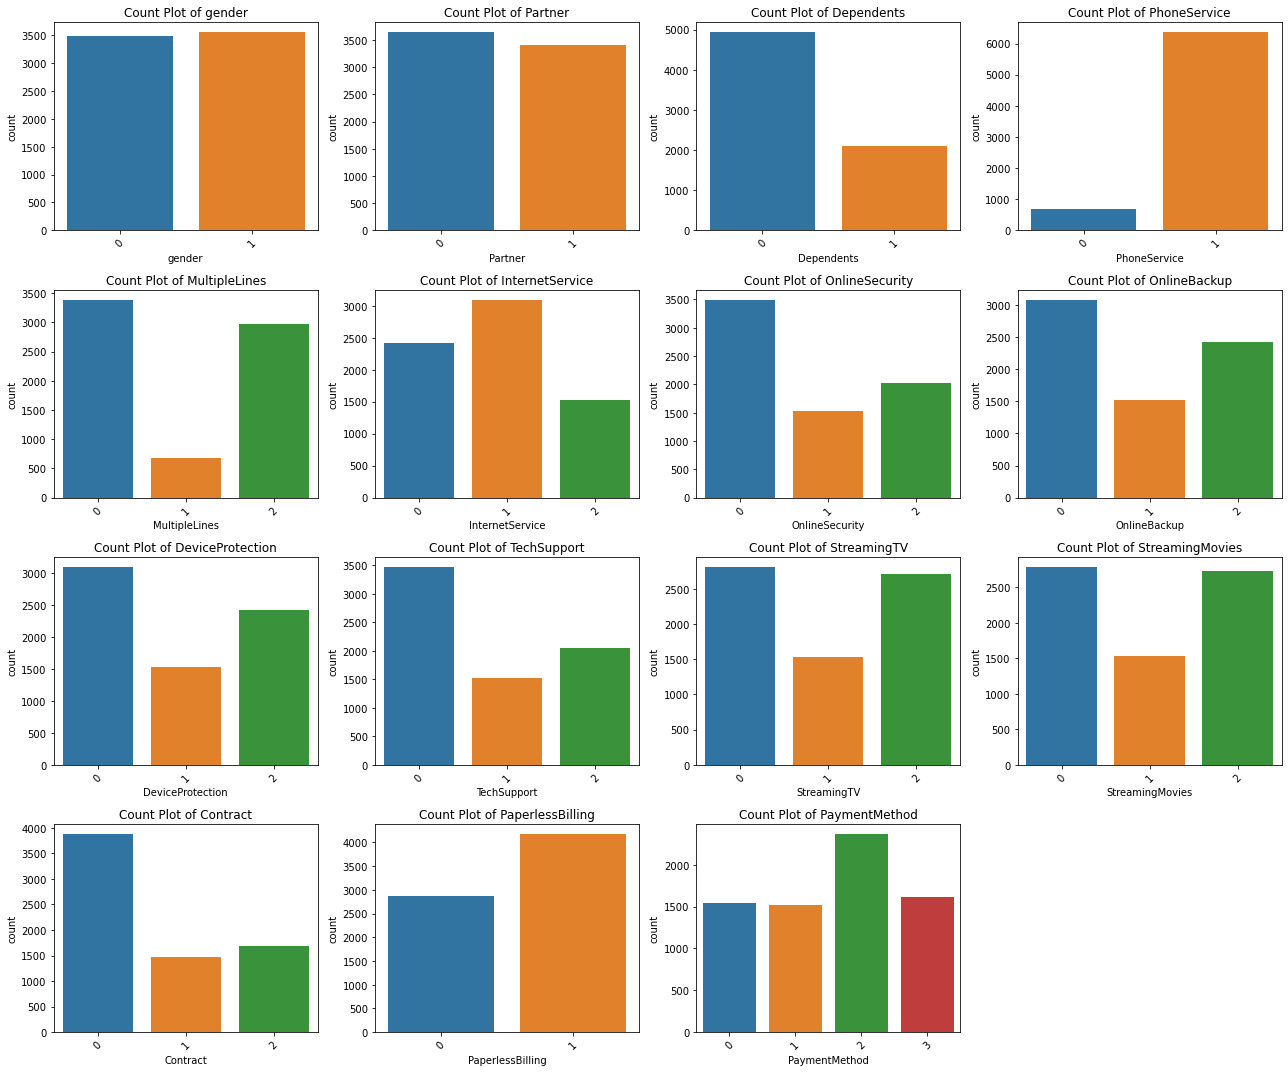

In [39]:
# Univariate analysis for Categorical variables
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Insights from the above graphs

customers from dependents are more likely to churn

Customers with Phone service has more churn 

### Bivariate Analysis 

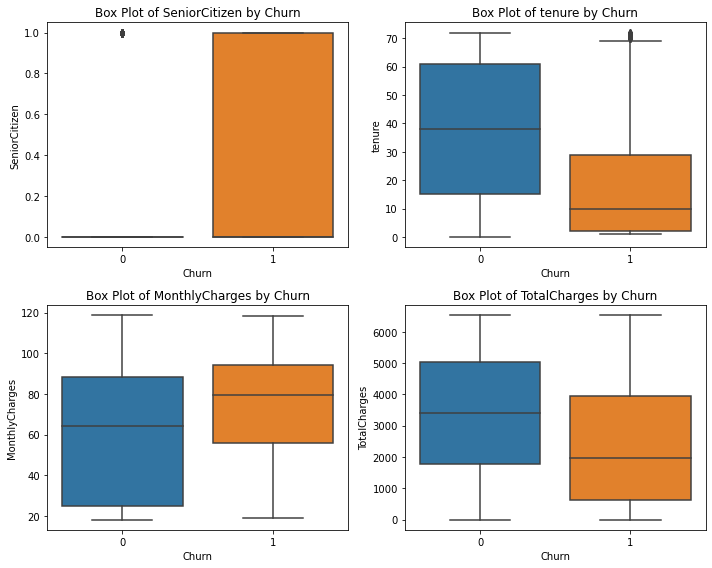

In [42]:
# Bivariate analysis for numeric variables
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'Box Plot of {feature} by Churn')
plt.tight_layout()
plt.show()


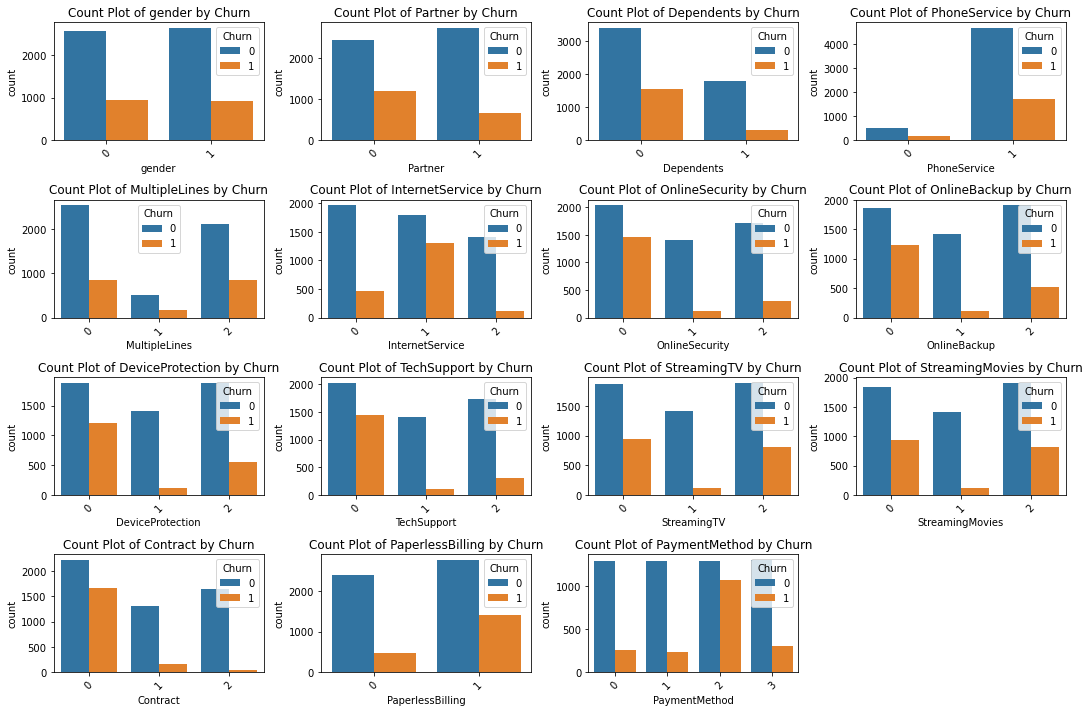

In [45]:
# Bivariate analysis for categorical variables
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'Count Plot of {feature} by Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model Building and Model Evaluation on Imbalanced Dataset

### 5. Model Building

In [88]:
# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Logistic Regression

In [89]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [91]:
# Make predictions
y_pred = logistic_reg.predict(X_test)

In [93]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[930 106]
 [161 212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



-- In this, I have used Logistic Regression as my model classification model as in this found customers who churned 

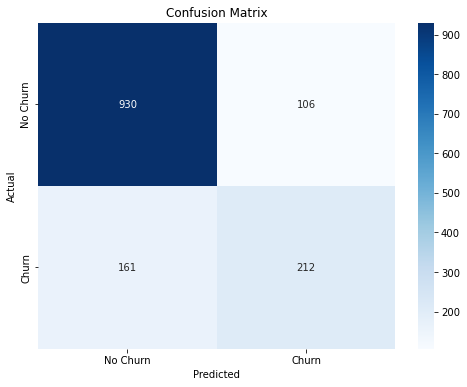

In [94]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [98]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.7963094393186657
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



# Model evaluation on Balanced Dataset

In [99]:
data['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

-- as the dataset is imbalanced and 27% of the customers have churned

## **There are so many techniques to handle the imbalanced data in classification models like sampling, feature selection.  In this I am using Oversampling** 


In [101]:
oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [102]:
y_train.value_counts() # checked the the number of samples in each and noe the data has balanced

Churn
0    4138
1    4138
Name: count, dtype: int64

In [103]:
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [104]:
preds = rf.predict(X_test)
print(accuracy_score(preds,y_test))

0.7835344215755855


# Model Tuning

--  model tuning is used to finding the optimal values of hyperparameters to maximize model performance

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [107]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [108]:
# Best parameters and model
print('Best parameters found:', grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [109]:
# Predictions with the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

In [110]:
# Evaluation of the best model
print('Accuracy:', accuracy_score(y_test, y_pred_best))
print('Classification Report:\n', classification_report(y_test, y_pred_best))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))


Accuracy: 0.7821149751596878
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409

Confusion Matrix:
 [[875 161]
 [146 227]]


# Feature Importance

             Feature  Importance
17    MonthlyCharges    0.138134
14          Contract    0.136742
18      TotalCharges    0.134182
4             tenure    0.122673
8     OnlineSecurity    0.086260
11       TechSupport    0.069289
16     PaymentMethod    0.043345
9       OnlineBackup    0.042891
10  DeviceProtection    0.030002
3         Dependents    0.027408
7    InternetService    0.027253
2            Partner    0.025014
0             gender    0.022715
6      MultipleLines    0.019708
15  PaperlessBilling    0.018503
12       StreamingTV    0.017786
13   StreamingMovies    0.017448
1      SeniorCitizen    0.013904
5       PhoneService    0.006744


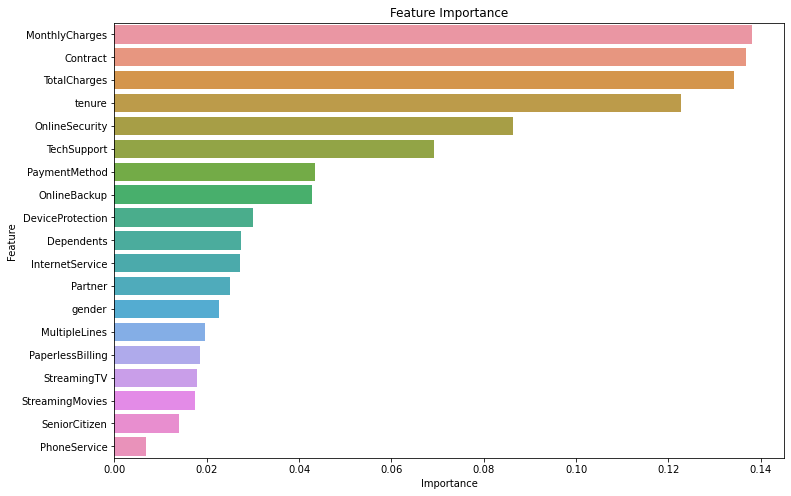

In [111]:
# Feature importance
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Deployment

In [119]:
!pip install flask flask-ngrok

  Obtaining dependency information for flask-ngrok from https://files.pythonhosted.org/packages/af/6c/f54cb686ad1129e27d125d182f90f52b32f284e6c8df58c1bae54fa1adbc/flask_ngrok-0.0.25-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
from sklearn.tree import DecisionTreeClassifier
import joblib


In [134]:
# Assuming X_train and y_train are your training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
# Save the model
joblib.dump(model, 'model.joblib')

['model.joblib']

In [136]:
from flask import Flask, jsonify, request
from flask_ngrok import run_with_ngrok
import joblib

In [137]:
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Load the model
model = joblib.load('model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the request
    data = request.get_json()
    # Make predictions
    predictions = model.predict(data)
    # Return predictions as JSON
    return jsonify(predictions.tolist())

if __name__ == '_main_':
    app.run()

In [138]:
#
import joblib

In [139]:
model = joblib.load(r"C:\Users\Hi\Desktop\Hackthon-PIDC\model.joblib")

In [140]:
model

RandomForestClassifier()